In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import HTC

In [3]:
# load connectome
# this is the original one, unmodified
W66=np.loadtxt("../Data/connectivity_matrix/weights.txt")

In [4]:
#create brain object for all simulation fixed parameters
brain=HTC.Brain()

n_neurons=brain.connectome(W66, normalize=False)

brain.set_netowrk_parameters(r1=2/n_neurons,
                             r2=(2/n_neurons)**0.2)

Connectome loaded but not yet normalized
r1 and r2 parameters now set successfully


In [16]:
attempts={0:1,
          40:1,
          70:1}
output,w_new=HTC.connectome_attempter(attempts,mode='add',W=W66)

In [17]:
#constants of the simulation
active_frac=0.1 #Initial fraction of active neurons
n_runs=100 #Parallel runs
tmin=0.01 #Min tc
tmax=0.3 #Max tc
delta_tc=0.01 #Variation of tc
dt=0.1 #Time step
n_timesteps=6000 #Total number of timesteps
s_step=10 #Campute s1 s2 every s_step (to speed up computing time)
compute_s1_s2=False 
compute_s_distrib=False
compute_fc=True

In [18]:
o=HTC.advanced_simulation(w_new, brain, output,active_frac=active_frac, n_runs=n_runs,
                      tmin=tmin, tmax=tmax, delta_tc=delta_tc,
                      dt=dt, n_timesteps=n_timesteps,
                      compute_s1_s2=compute_s1_s2, s_step=s_step,
                      compute_s_distrib=compute_s_distrib, tc_distrib=0.15,
                      compute_fc=compute_fc)

Connectome of shape (66, 66) now loaded and normalized successfully
Connectome of shape (66, 66) now loaded and normalized successfully
Connectome of shape (66, 66) now loaded and normalized successfully


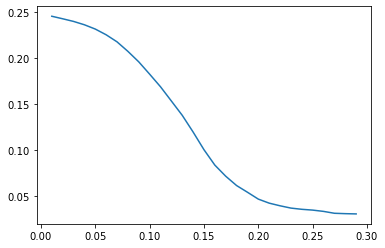

In [23]:
plt.plot(o[0][0]['tc'],o[0][0]['activity'])

In [24]:
import pickle

In [25]:
pickle.dump(o, open("myobject", "wb"))